In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

print("Shape:", df.shape)
display(df.head())

Saving preprocessed_data.xlsx to preprocessed_data (1).xlsx
Shape: (4566, 11)


,S_No,BrandName,Product_ID,Product_Name,Brand_Desc,Product_Size,Currancy,MRP,SellPrice,Discount,Category
0,1,2,4564,4450,324,411,0,3900.0,3120,20,1
1,2,0,4450,4451,4052,374,0,1899.0,569,70,6
2,3,0,4476,4477,3822,337,0,1499.0,599,60,6
3,4,0,4487,4488,3828,370,0,1599.0,639,60,6
4,5,0,4498,4499,3817,337,0,1199.0,479,60,6


In [ ]:
df['Fake_Real'] = (df['SellPrice'] > 0.6 * df['MRP']).astype(int)

In [ ]:
df.to_excel('df_with_fake_real.xlsx', index=False)

from google.colab import files
files.download('df_with_fake_real.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fake_real_distribution = df['Fake_Real'].value_counts()
print("Distribution of 'Fake_Real' column:")
display(fake_real_distribution)

Distribution of 'Fake_Real' column:


,count
Fake_Real,
1,2786
0,1780


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



X = df.drop(["S_No", "Fake_Real"], axis=1)
y = df["Fake_Real"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       538

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



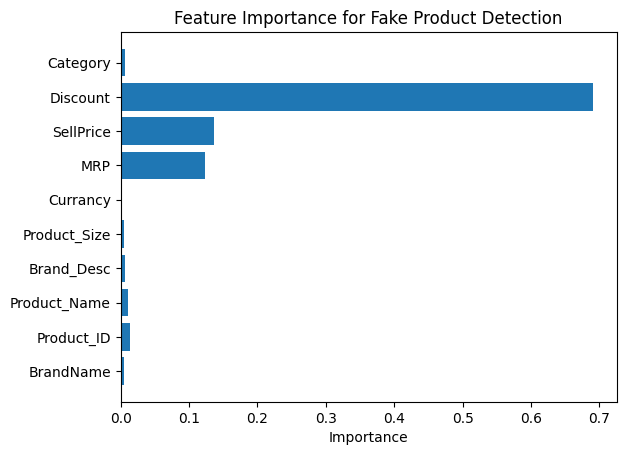

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.title("Feature Importance for Fake Product Detection")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       538

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 0.9824945295404814
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       376
           1       0.99      0.98      0.98       538

    accuracy                           0.98       914
   macro avg       0.98      0.98      0.98       914
weighted avg       0.98      0.98      0.98       914



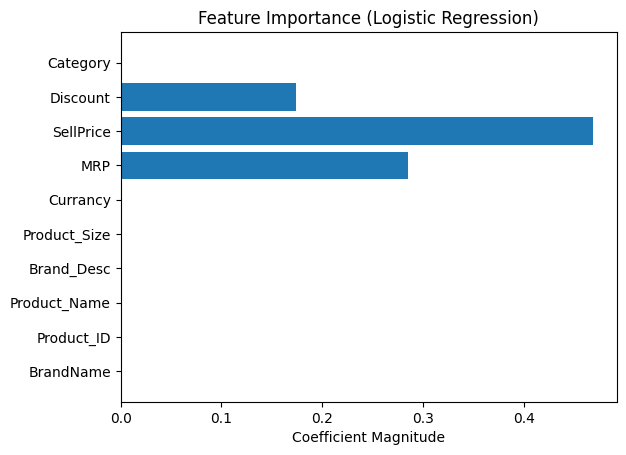

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

coef = log_model.coef_[0]
plt.barh(X.columns, np.abs(coef))
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.show()


In [ ]:
print("random forest Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("SVM:", accuracy_score(y_test, y_pred_svm))


random forest Accuracy: 1.0
Logistic Regression: 1.0
SVM: 0.9824945295404814


In [ ]:
model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let it grow fully
    random_state=42,
)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       538

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



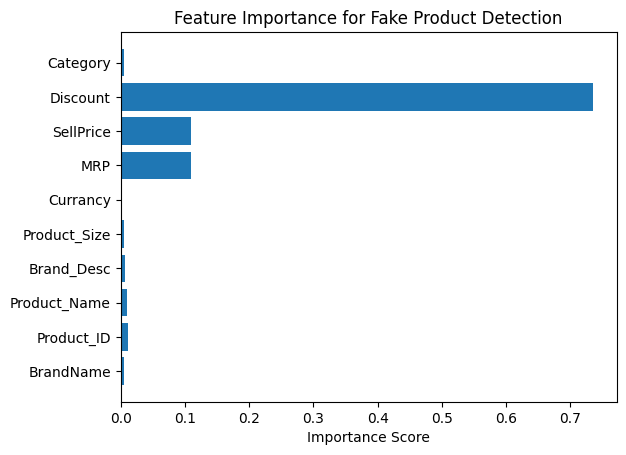

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance for Fake Product Detection")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
import joblib
joblib.dump(model, "fake_product_analyzer.pkl")
print("💾 Model saved as fake_product_analyzer.pkl")


💾 Model saved as fake_product_analyzer.pkl


In [ ]:
new_data = pd.DataFrame([{
    "BrandName": 2,
    "Product_ID": 4564,
    "Product_Name": 4450,
    "Brand_Desc": 324,
    "Product_Size": 411,
    "Currancy": 0,
    "MRP": 3900.0,
    "SellPrice": 3120,
    "Discount": 20,
    "Category": 1
}])

loaded_model = joblib.load("fake_product_analyzer.pkl")
pred = loaded_model.predict(new_data)[0]

print("Prediction:", "✅ Real Product" if pred == 1 else "⚠️ Fake Product")


Prediction: ✅ Real Product
